In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import apyori as ap
from apyori import apriori 
import mlxtend as ml
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install apyori

  Stored in directory: /Users/shloakgupta/Library/Caches/pip/wheels/7b/2a/35/c0c3749c1a36d4f454ea22d8396e1b854b86340d63cbbb7949
Successfully built apyori


In [4]:
!pip install mlxtend

     |████████████████████████████████| 1.3MB 1.7MB/s eta 0:00:01


In [4]:
#Read data
df = pd.read_csv('ass1.csv')

In [5]:
print('Shape=',df.shape)
print(df.isnull().sum())

Shape= (1176, 35)
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            2
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      1
HourlyRate                  0
JobInvolvement              0
JobLevel                    1
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    1
PercentSalaryHike           1
PerformanceRating           1
RelationshipSatisfaction    1
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           2
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole    

In [6]:
df.iloc[:,:16].describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel
count,1176.000000,1176.000000,1174.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1175.000000
mean,36.960034,800.386905,9.495741,2.895408,1.0,1036.430272,2.704932,65.822279,2.740646,2.068936
std,9.071964,404.709216,10.251379,1.025685,0.0,600.681874,1.094128,20.292035,0.719277,1.109590
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000
25%,30.000000,461.750000,2.000000,2.000000,1.0,499.750000,2.000000,48.000000,2.000000,1.000000
50%,36.000000,796.000000,7.000000,3.000000,1.0,1032.500000,3.000000,66.000000,3.000000,2.000000
75%,43.000000,1162.000000,14.000000,4.000000,1.0,1574.500000,4.000000,83.000000,3.000000,3.000000
max,60.000000,1499.000000,224.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000


In [7]:
df.iloc[:,16:].describe()

,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1176.000000,1176.000000,1176.000000,1176.000000,1175.000000,1175.000000,1175.000000,1176.0,1176.000000,1174.000000,1176.000000,1176.000000,1176.000000,1176.000000,1175.000000,1176.000000
mean,2.710034,6525.534014,14467.688776,2.709184,15.295319,3.162553,2.718298,80.0,0.795918,11.402896,2.809524,2.747449,6.918367,4.151361,2.125106,4.242347
std,1.113217,4707.507472,7107.658362,2.476191,3.698902,0.369115,1.084095,0.0,0.847033,8.368864,1.307697,0.691586,6.107140,3.501618,3.183567,7.210390
min,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2954.500000,8275.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,3.000000,4950.500000,14488.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,4.000000,8354.500000,20627.250000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,4.000000,19973.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,114.000000,6.000000,4.000000,40.000000,18.000000,15.000000,219.000000


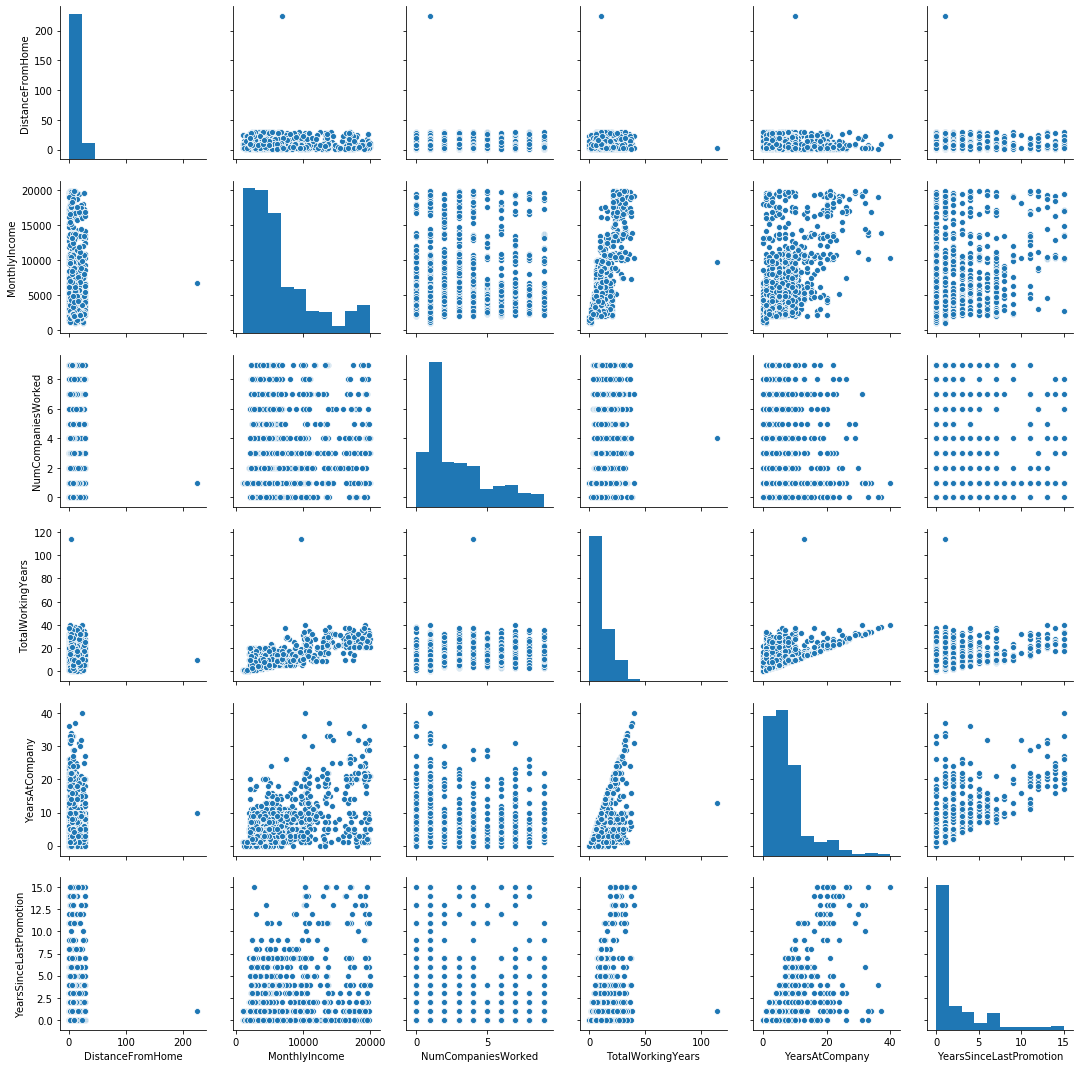

In [8]:
#skewed variables: DistanceFromHome,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,
#YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
skewed_variables = ['DistanceFromHome','MonthlyIncome','NumCompaniesWorked','TotalWorkingYears','YearsAtCompany',
                    'YearsSinceLastPromotion']
sns.pairplot(df.loc[:,skewed_variables])
plt.show()

### Cleaning

In [46]:

df['YearsWithCurrManager'].describe()
df = df.loc[df['YearsWithCurrManager']<=df['YearsAtCompany'],:]

print(df['EmployeeCount'].unique())
df.drop('EmployeeCount',axis=1,inplace=True)

len(df['EmployeeNumber'].unique()) #Primary key
df.drop('EmployeeNumber',axis=1,inplace=True)

print(df['StandardHours'].unique())
df.drop('StandardHours',axis=1,inplace=True)

print(df['Over18'].unique())
df.drop('Over18',axis=1,inplace=True)

[1]
[80]
['Y']


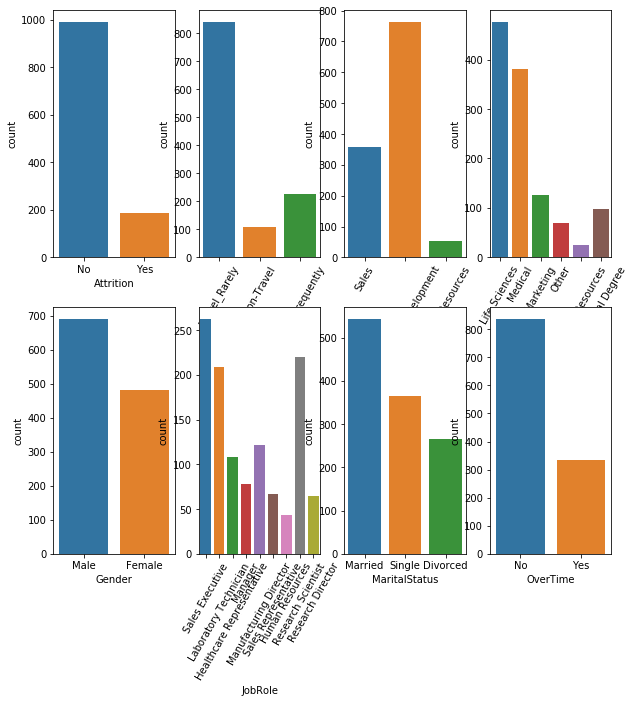

In [57]:

cat_var = ['Attrition', 'BusinessTravel','Department','EducationField','Gender','JobRole', 'MaritalStatus','Over18','OverTime']
f, axes = plt.subplots(2, 4, figsize=(10, 10))
sns.countplot(df['Attrition'],ax=axes[0,0])

p2 = sns.countplot(df['BusinessTravel'],ax=axes[0,1])
p2.set_xticklabels(p2.get_xticklabels(), rotation=60)

p3 = sns.countplot(df['Department'],ax=axes[0,2])
p3.set_xticklabels(p3.get_xticklabels(), rotation=60)

p4 = sns.countplot(df['EducationField'],ax=axes[0,3])
p4.set_xticklabels(p4.get_xticklabels(), rotation=60)

sns.countplot(df['Gender'],ax=axes[1,0])
p6 = sns.countplot(df['JobRole'],ax=axes[1,1])
p6.set_xticklabels(p6.get_xticklabels(), rotation=60)

sns.countplot(df['MaritalStatus'],ax=axes[1,2])
sns.countplot(df['OverTime'],ax=axes[1,3])
plt.show()

### Preprocessing

In [53]:
discretized_df = df.loc[:,['Attrition', 'BusinessTravel','Department','EducationField','Gender','JobRole', 'MaritalStatus',
                             'OverTime']]

In [54]:
#variables to be cut(discretized)
cols = ['Age', 'DailyRate','DistanceFromHome', 'Education','EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike','RelationshipSatisfaction', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 
        'YearsSinceLastPromotion','YearsWithCurrManager']

In [56]:
def cut(variable,n):
    if n==3:
        return pd.qcut(variable, 3,labels = ['Low_'+str(variable.name),'Med_'+str(variable.name),'High_'+str(variable.name)])
    elif n==2:
        return pd.qcut(variable, 2,labels = ['Low_'+str(variable.name),'High_'+str(variable.name)])

In [12]:
for i in cols:
    try:
        discretized_df[str(i)+'_grp'] = cut(df.loc[:,i],3)
    except:
        discretized_df[str(i)+'_grp'] = cut(df.loc[:,i],2)

In [21]:
discretized_df['PerformanceRating_grp'] = pd.cut(df['PerformanceRating'],2,
                                                  labels =['low_PerformanceRating','high_PerformanceRating'])
discretized_df['Attrition'] = discretized_df['Attrition'].apply(lambda x: 'No_Attrition' if x=='No' else 'Attrition')
discretized_df['OverTime'] = discretized_df['OverTime'].apply(lambda x: 'No_OverTime' if x=='No' else 'OverTime')

In [22]:
discretized_df = discretized_df.dropna(axis=0,how='any')
discretized_df.shape

(1173, 9)

In [23]:
discretized_df.shape, df.shape

((1173, 9), (1175, 31))

In [24]:
discretized_df.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,PerformanceRating_grp
0,No_Attrition,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Married,No_OverTime,low_PerformanceRating
1,No_Attrition,Travel_Rarely,Research & Development,Life Sciences,Female,Laboratory Technician,Married,No_OverTime,high_PerformanceRating
2,No_Attrition,Travel_Rarely,Sales,Medical,Female,Sales Executive,Single,No_OverTime,low_PerformanceRating
3,No_Attrition,Non-Travel,Research & Development,Medical,Male,Healthcare Representative,Divorced,OverTime,low_PerformanceRating
4,No_Attrition,Travel_Rarely,Research & Development,Life Sciences,Female,Healthcare Representative,Single,No_OverTime,low_PerformanceRating


### Frequency plot

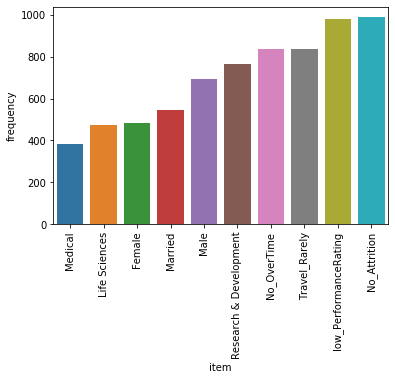

In [25]:
melted_data = pd.melt(discretized_df)
frequency = melted_data.groupby(by=['value'])['value'].count().sort_values(ascending=True)
freq_itemset = pd.DataFrame({'item':frequency.index, 'frequency':frequency.values})
g = sns.barplot(data=freq_itemset.tail(10), x='item', y='frequency')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

In [28]:
records = []
for i in range(0,len(discretized_df)):
    records.append([str(discretized_df.values[i,j]) 
    for j in range(0, len(discretized_df.columns))])

In [29]:
#Default parameters
# frequent_itemset = ap.apriori(records)
# #min_support=0.8, min_confidence=0.8,min_lift=1,min_length=2)
# results = list(frequent_itemset)
# print(len(results))
# results[1:5]

In [29]:
#Tuned parameters
frequent_itemset = ap.apriori(records,min_support=0.6, min_confidence=0.6,min_lift=1,min_length=2)
results = list(frequent_itemset)
len(results)

29

In [30]:
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets.sort_values(by='support',ascending=False).head(10)

,support,itemsets
1,0.843137,(No_Attrition)
5,0.837170,(low_PerformanceRating)
4,0.714408,(Travel_Rarely)
2,0.712702,(No_OverTime)
9,0.709292,"(No_Attrition, low_PerformanceRating)"
3,0.650469,(Research & Development)
6,0.635976,"(No_Attrition, No_OverTime)"
8,0.613811,"(No_Attrition, Travel_Rarely)"
13,0.603581,"(low_PerformanceRating, Travel_Rarely)"
11,0.595908,"(low_PerformanceRating, No_OverTime)"


### Association Rules

In [31]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(No_Attrition),(No_OverTime),0.843137,0.712702,0.635976,0.754297,1.058362,0.035070,1.169289
1,(No_OverTime),(No_Attrition),0.712702,0.843137,0.635976,0.892344,1.058362,0.035070,1.457081
2,(No_Attrition),(Research & Development),0.843137,0.650469,0.567775,0.673407,1.035265,0.019340,1.070236
3,(Research & Development),(No_Attrition),0.650469,0.843137,0.567775,0.872870,1.035265,0.019340,1.233879
4,(No_Attrition),(Travel_Rarely),0.843137,0.714408,0.613811,0.728008,1.019038,0.011467,1.050004


In [32]:
rules[(rules['lift']>1) & (rules['confidence'] > 0.8)].sort_values(by='lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(No_OverTime),(No_Attrition),0.712702,0.843137,0.635976,0.892344,1.058362,0.035070,1.457081
11,"(low_PerformanceRating, No_OverTime)",(No_Attrition),0.595908,0.843137,0.531117,0.891273,1.057092,0.028685,1.442724
3,(Research & Development),(No_Attrition),0.650469,0.843137,0.567775,0.872870,1.035265,0.019340,1.233879
16,"(low_PerformanceRating, Travel_Rarely)",(No_Attrition),0.603581,0.843137,0.520034,0.861582,1.021876,0.011133,1.133253
5,(Travel_Rarely),(No_Attrition),0.714408,0.843137,0.613811,0.859189,1.019038,0.011467,1.113991
15,"(No_Attrition, Travel_Rarely)",(low_PerformanceRating),0.613811,0.837170,0.520034,0.847222,1.012008,0.006170,1.065799
9,(Travel_Rarely),(low_PerformanceRating),0.714408,0.837170,0.603581,0.844869,1.009197,0.005500,1.049629
6,(No_Attrition),(low_PerformanceRating),0.843137,0.837170,0.709292,0.841254,1.004879,0.003443,1.025727
7,(low_PerformanceRating),(No_Attrition),0.837170,0.843137,0.709292,0.847251,1.004879,0.003443,1.026928


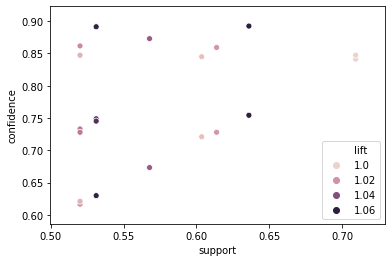

In [33]:
#plotting rules
b = sns.scatterplot(data=rules,x='support',y='confidence',hue='lift')
#sns.regplot(x=rules["support"],y=rules["confidence"],fit_reg=False)
#plt.scatter(x=rules["support"],y=rules["confidence"],c=rules['lift'],s=100)
plt.show()

### Supervised Mining 

In [34]:
#Rules to predict Attrition
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules[rules['consequents']==frozenset({'No_Attrition'})].sort_values(by='lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(No_OverTime),(No_Attrition),0.712702,0.843137,0.635976,0.892344,1.058362,0.035070,1.457081
11,"(low_PerformanceRating, No_OverTime)",(No_Attrition),0.595908,0.843137,0.531117,0.891273,1.057092,0.028685,1.442724
3,(Research & Development),(No_Attrition),0.650469,0.843137,0.567775,0.872870,1.035265,0.019340,1.233879
16,"(low_PerformanceRating, Travel_Rarely)",(No_Attrition),0.603581,0.843137,0.520034,0.861582,1.021876,0.011133,1.133253
5,(Travel_Rarely),(No_Attrition),0.714408,0.843137,0.613811,0.859189,1.019038,0.011467,1.113991
7,(low_PerformanceRating),(No_Attrition),0.837170,0.843137,0.709292,0.847251,1.004879,0.003443,1.026928


In [37]:
sum(discretized_df['Attrition'] == 'Attrition')

184

# https://association-rules.herokuapp.com